In [39]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df=pd.read_csv('Cleaned_salary_data.csv')

In [61]:
df.tail(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,company_age,python,r-studio,spark,aws,excel
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,84.5,GSK\n,MA,0,193,0,0,0,1,0
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,102.5,Eventbrite\n,TN,0,17,1,0,1,1,0
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,73.5,Software Engineering Institute\n,PA,1,39,0,0,0,0,1
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,127.5,"Numeric, LLC\n",PA,0,-1,0,0,0,0,1
741,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,...,93.5,Riverside Research Institute\n,OH,0,56,1,0,0,0,0


create specific columns for job title and seniority

In [62]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr'in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [63]:
df['Job_simplification']=df['Job Title'].apply(title_simplifier)

In [64]:
df.Job_simplification.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: Job_simplification, dtype: int64

In [65]:
df['seniority']=df['Job Title'].apply(seniority)

In [66]:
df.seniority.value_counts()

na        520
senior    220
junior      2
Name: seniority, dtype: int64

 los angeles is not a state

In [67]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [68]:
df['job state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA'  )

In [69]:
df['job state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job state, dtype: int64

In [70]:
#Job description length
df['dscrpt_len']=df['Job Description'].apply(lambda x: len(x))
df['dscrpt_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: dscrpt_len, Length: 742, dtype: int64

In [71]:
df['no_of_comp']=df.Competitors.apply(lambda x: len(x.split(',')) if x != '-1'  else 0) 

In [72]:
#hourly wage to annual
df['min_salary']=df.apply(lambda x:x.min_salary*2 if x.hourly ==1 else x.min_salary,axis=1)
df['max_salary']=df.apply(lambda x:x.max_salary*2 if x.hourly ==1 else x.max_salary,axis=1)

In [73]:
df[df.hourly==1][['min_salary','max_salary','hourly']]

,min_salary,max_salary,hourly
165,34,48,1
177,42,68,1
197,36,50,1
202,42,68,1
210,30,50,1
246,34,48,1
271,42,68,1
337,36,50,1
345,48,78,1
357,42,68,1


In [74]:
df['company_txt']=df.company_txt.apply(lambda x: x.replace('\n',''))

In [75]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [77]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,same_state,company_age,python,r-studio,spark,aws,excel,dscrpt_len,no_of_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [78]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r-studio', 'spark', 'aws', 'excel', 'Job_simplification', 'seniority',
       'job state', 'dscrpt_len', 'no_of_comp'],
      dtype='object')

<AxesSubplot: >

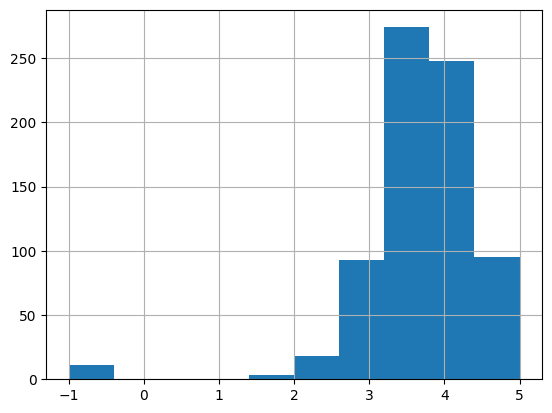

In [81]:
df.Rating.hist()

<AxesSubplot: >

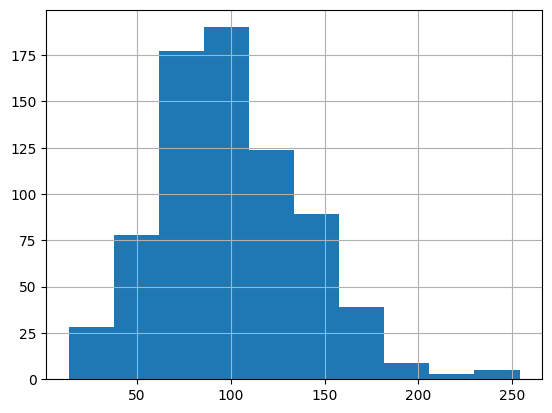

In [83]:
df.avg_salary.hist()

<AxesSubplot: >

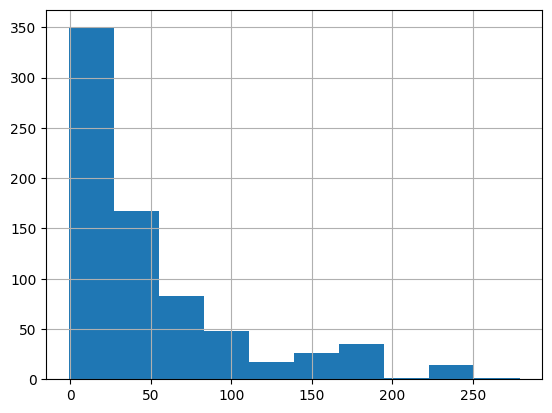

In [86]:
df.company_age.hist()

<AxesSubplot: >

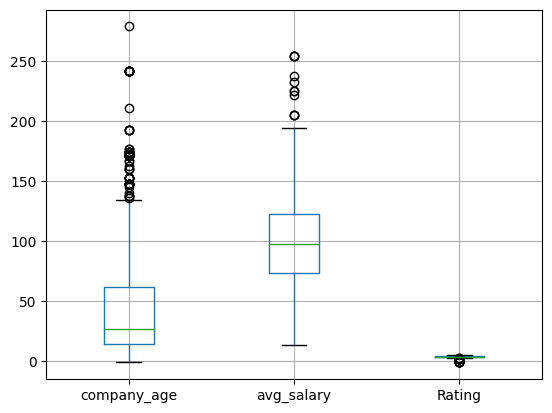

In [89]:
df.boxplot(column=['company_age','avg_salary','Rating'])

In [92]:
df[['avg_salary','company_age','Rating','dscrpt_len']].corr()

,avg_salary,company_age,Rating,dscrpt_len
avg_salary,1.000000,0.019410,0.013492,0.078808
company_age,0.019410,1.000000,0.026164,0.164730
Rating,0.013492,0.026164,1.000000,-0.012281
dscrpt_len,0.078808,0.164730,-0.012281,1.000000


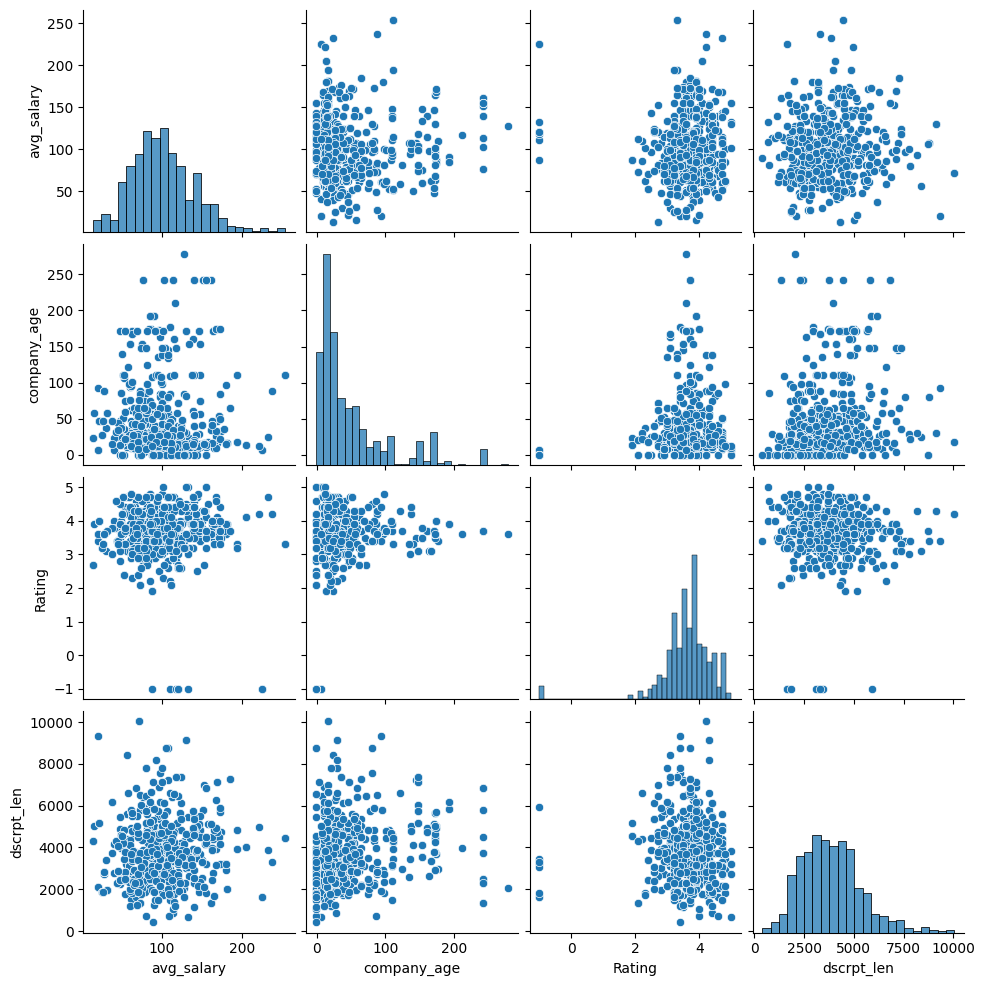

In [93]:
sns.pairplot(df[['avg_salary','company_age','Rating','dscrpt_len']])
plt.show()

<AxesSubplot: >

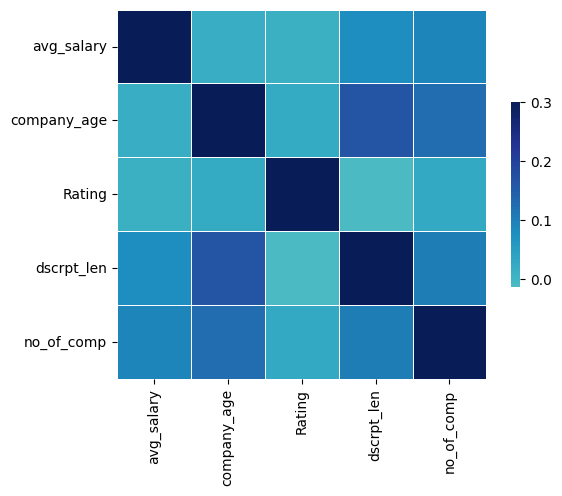

In [95]:
sns.heatmap(df[['avg_salary','company_age','Rating','dscrpt_len','no_of_comp']].corr(),vmax=.3,center=0,cmap='YlGnBu',square=True,linewidths=.5,cbar_kws={'shrink':.5})

In [96]:
df_cat=df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_txt','job_state','same_state', 'python',
       'r-studio', 'spark', 'aws', 'excel', 'Job_simplification', 'seniority']]

graph for Location total: 200


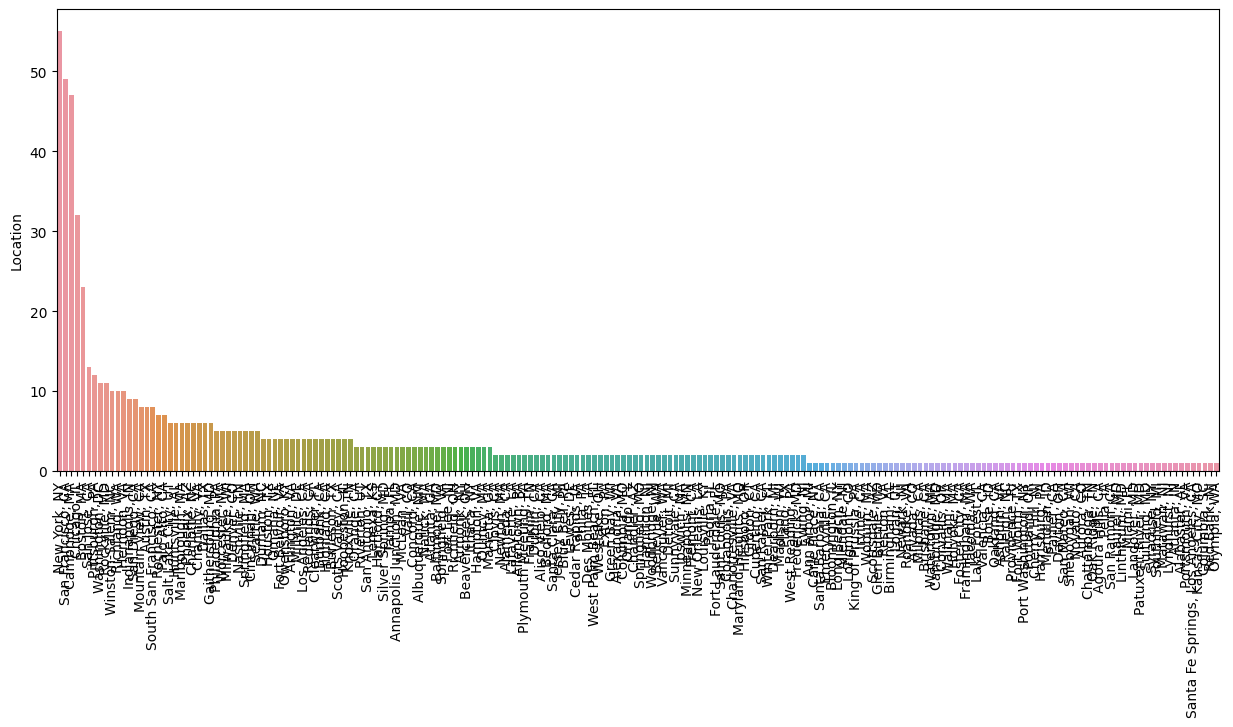

graph for Headquarters total: 198


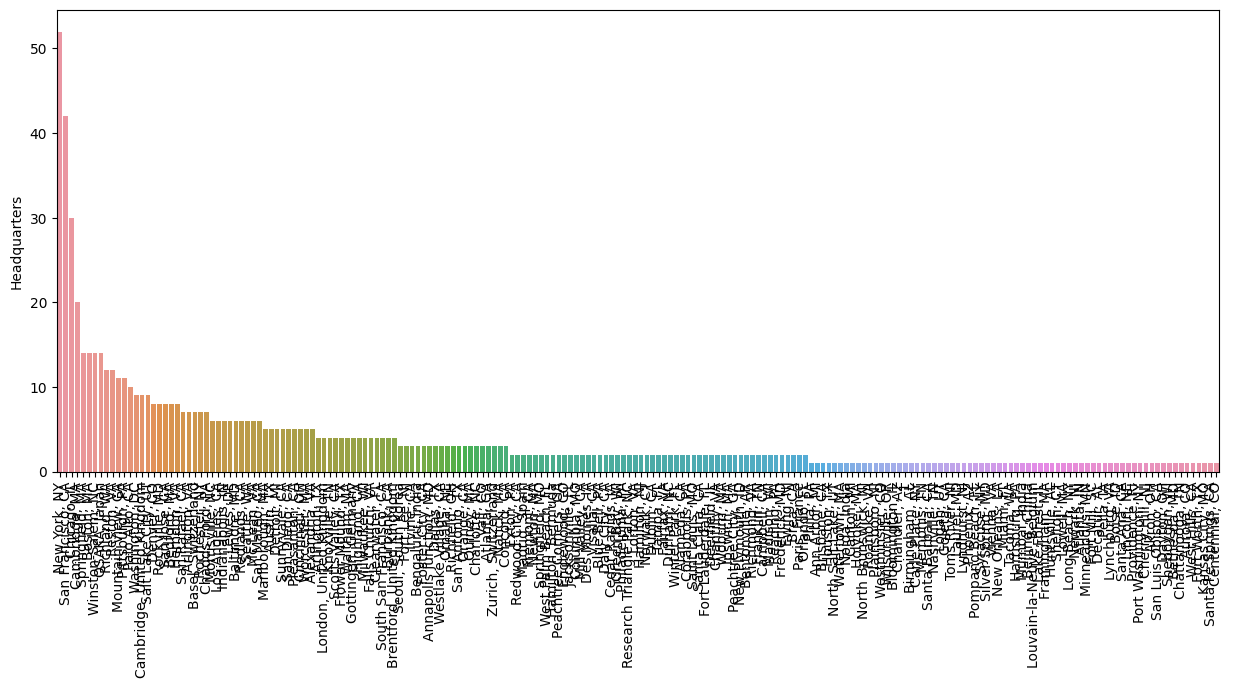

graph for Size total: 9


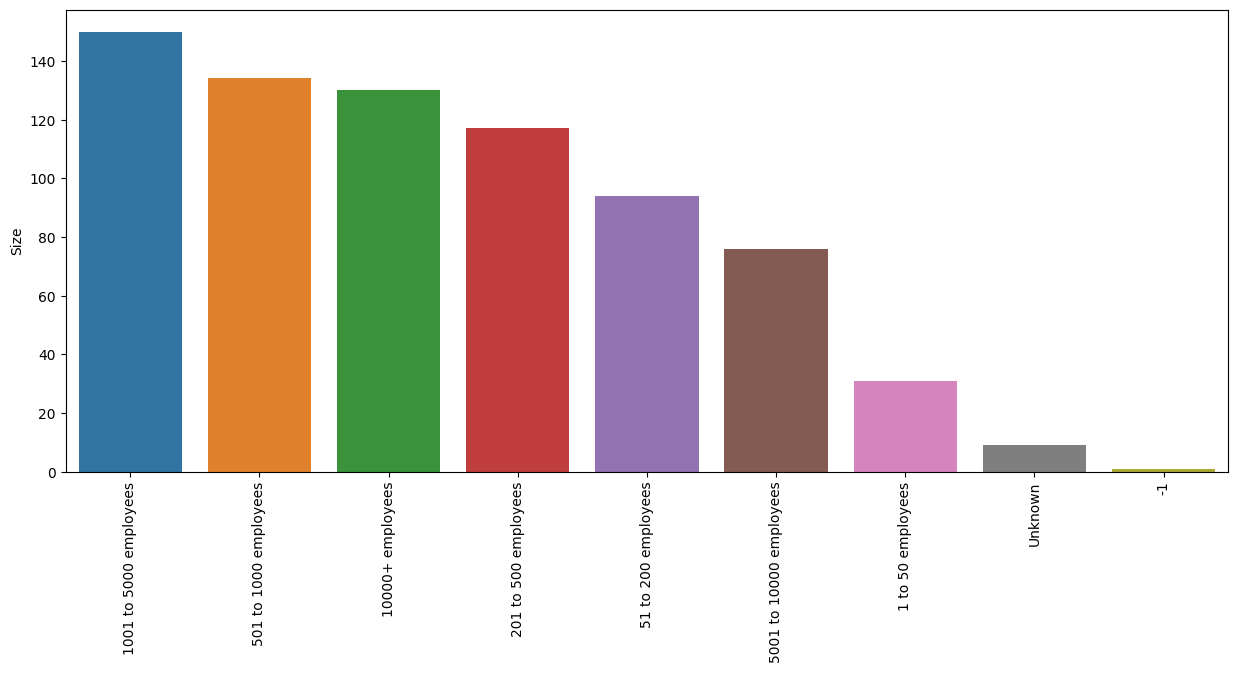

graph for Type of ownership total: 11


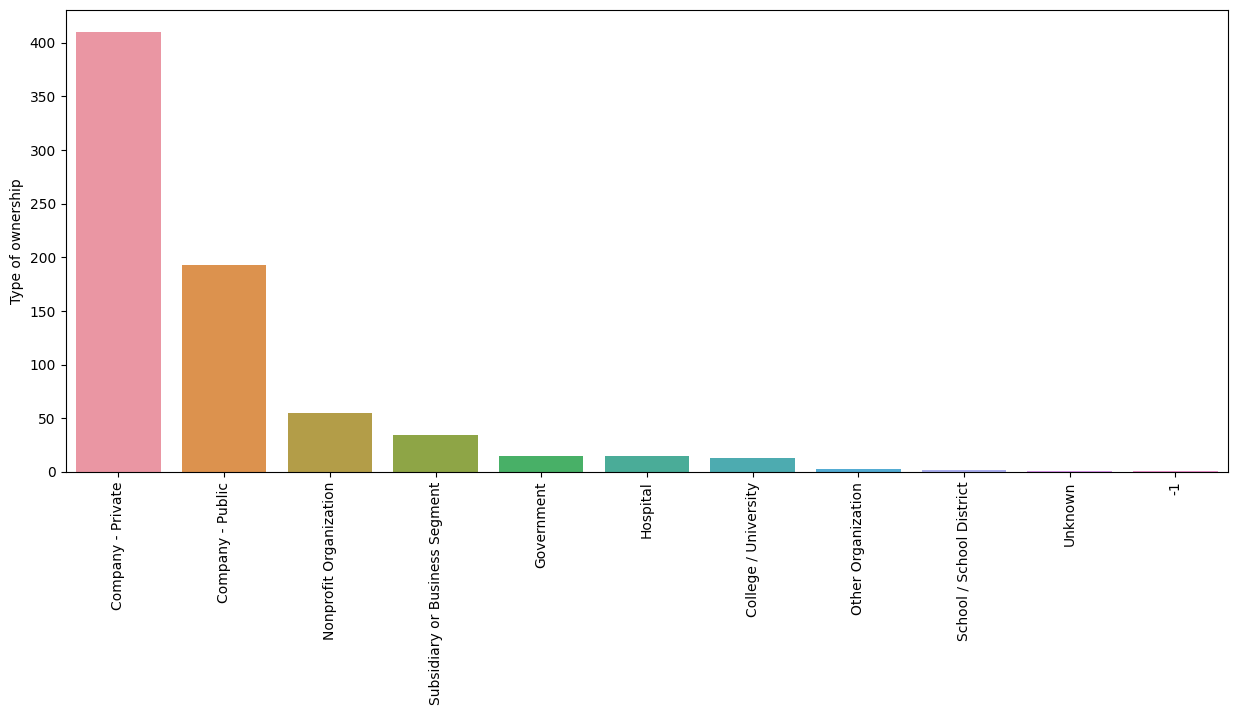

graph for Industry total: 60


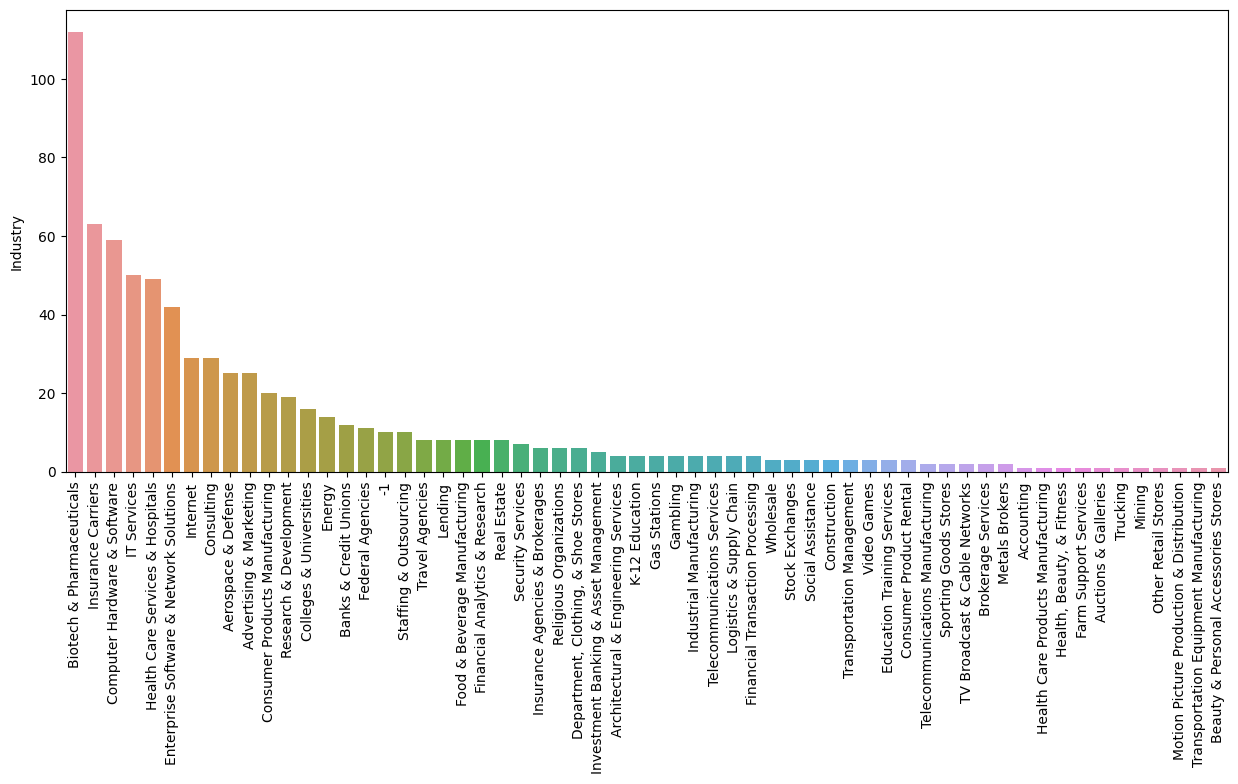

graph for Sector total: 25


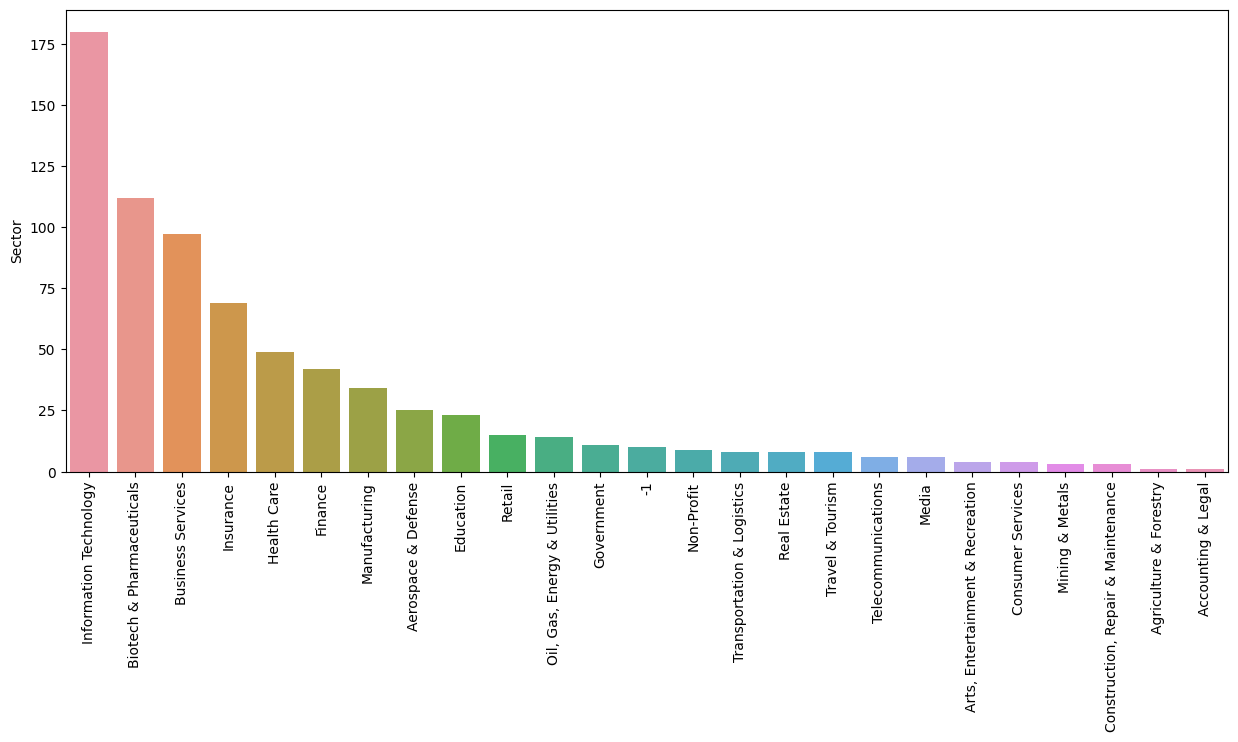

graph for Revenue total: 14


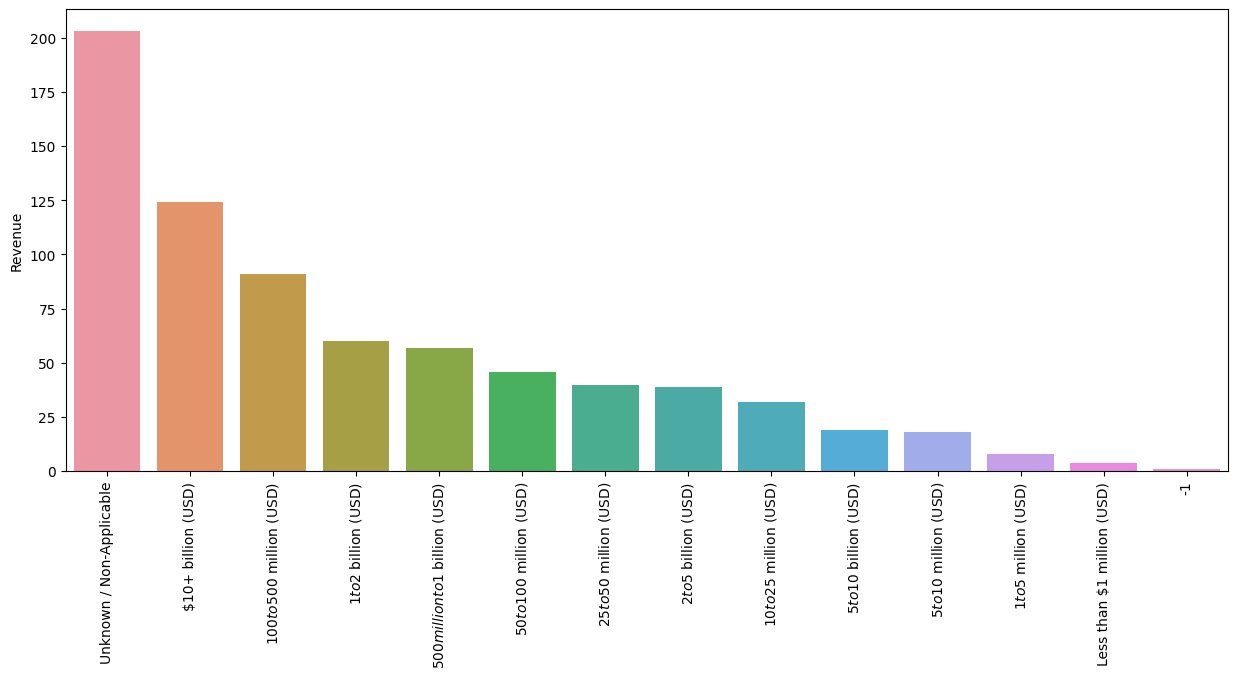

graph for company_txt total: 343


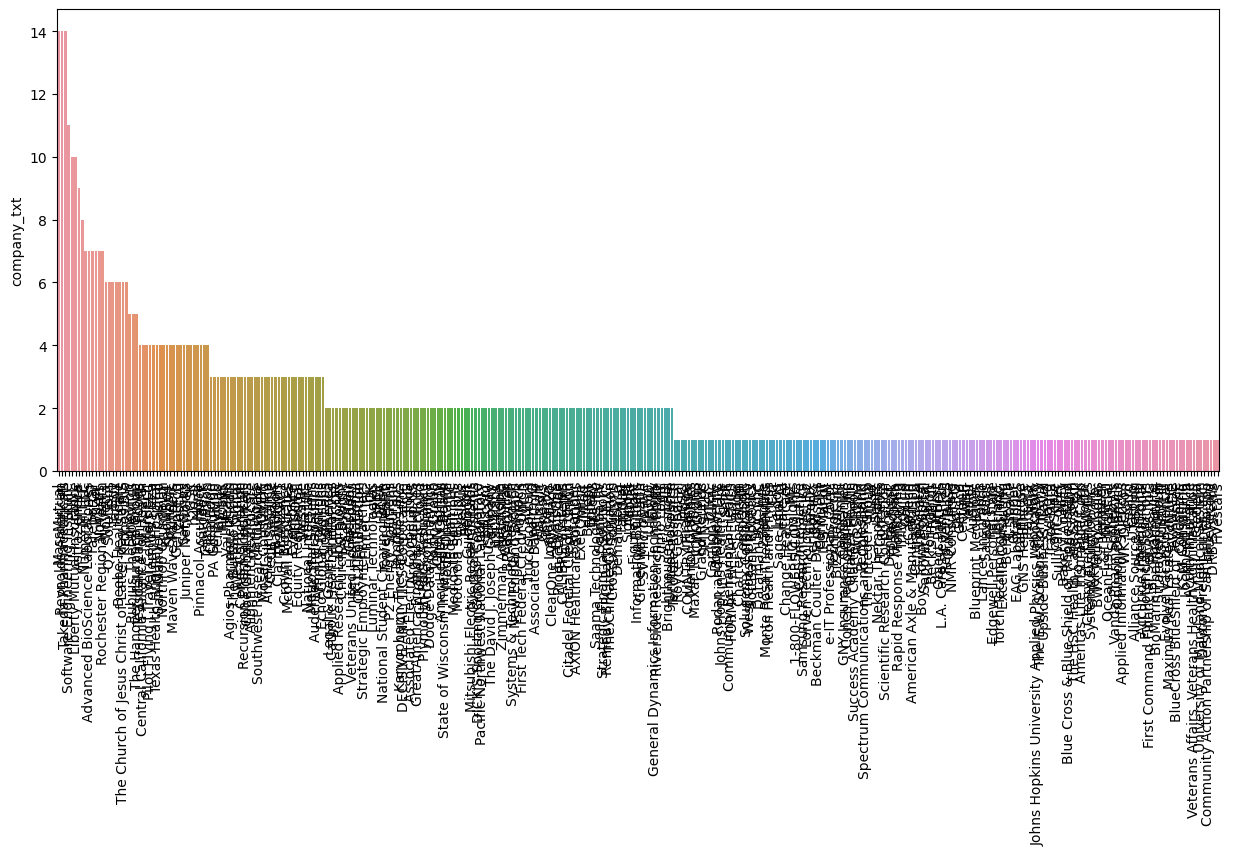

graph for job_state total: 38


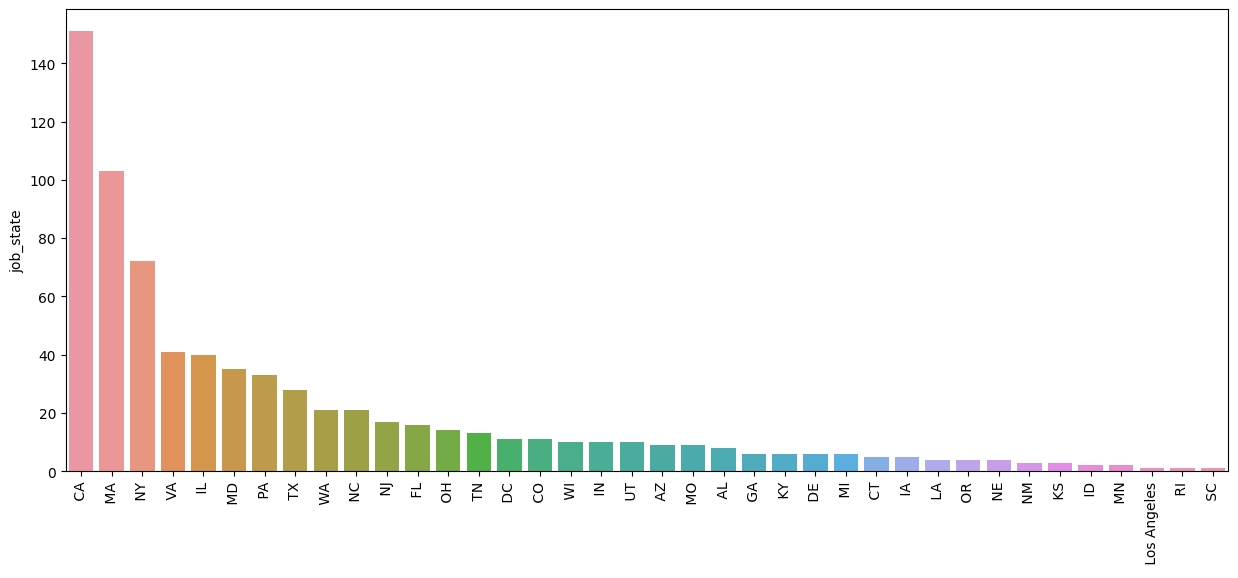

graph for same_state total: 2


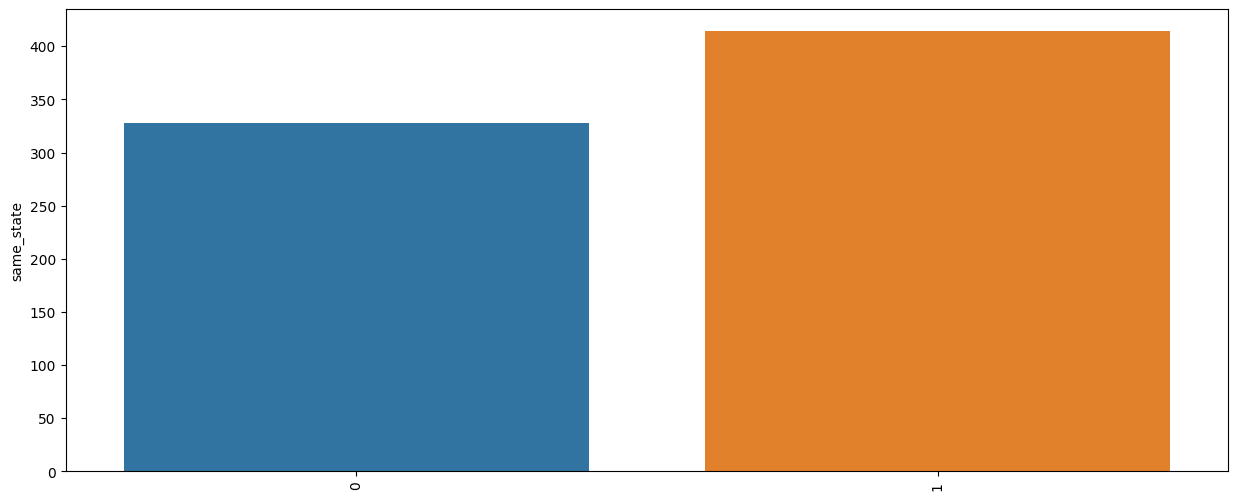

graph for python total: 2


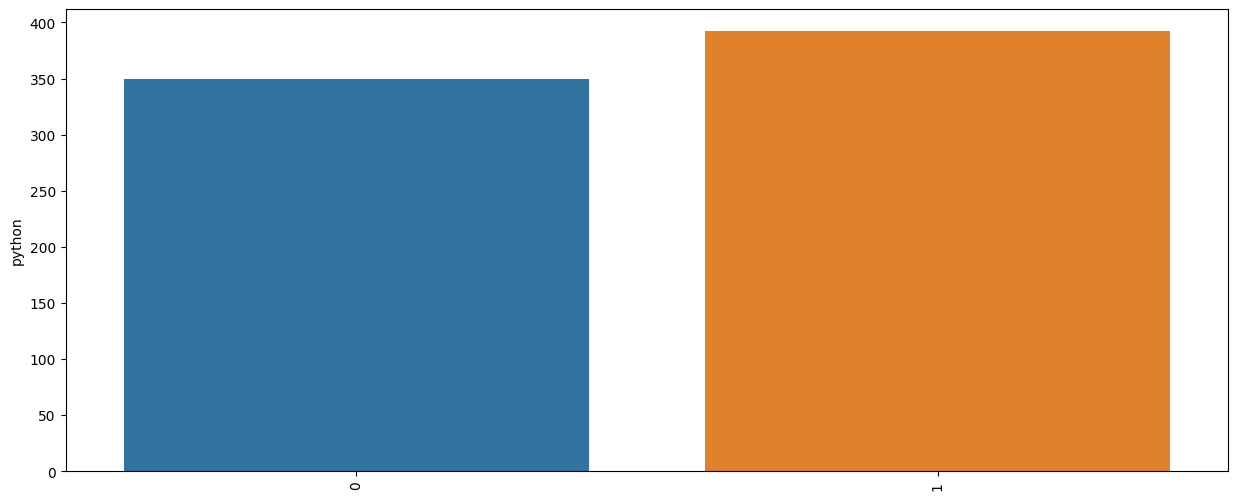

graph for r-studio total: 2


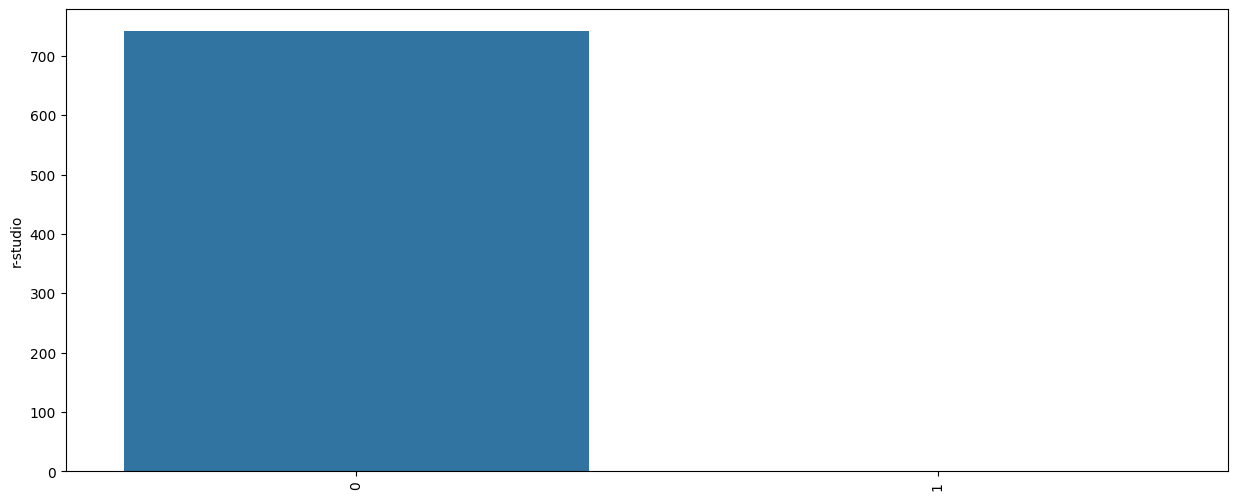

graph for spark total: 2


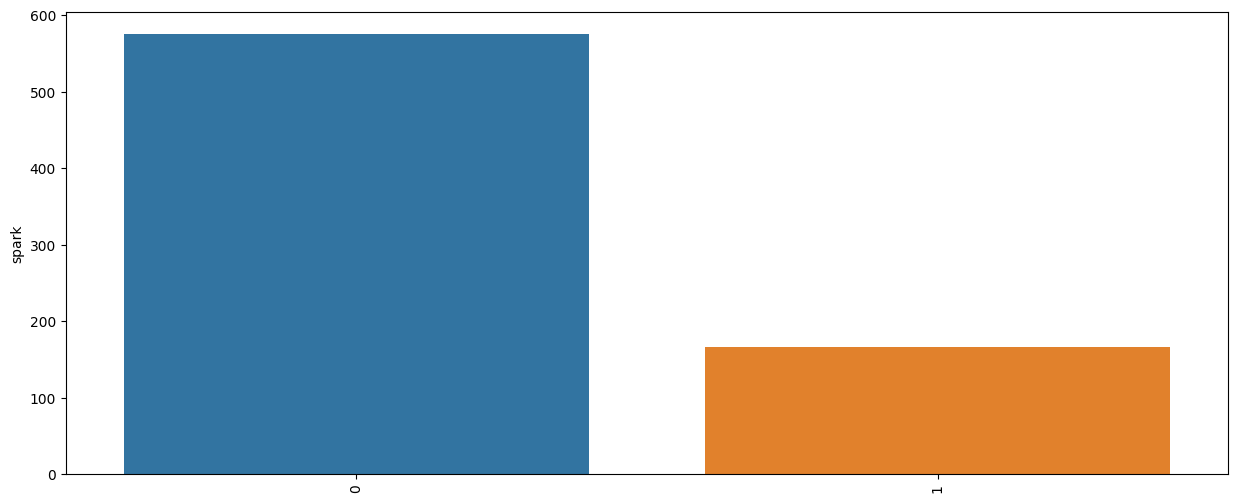

graph for aws total: 2


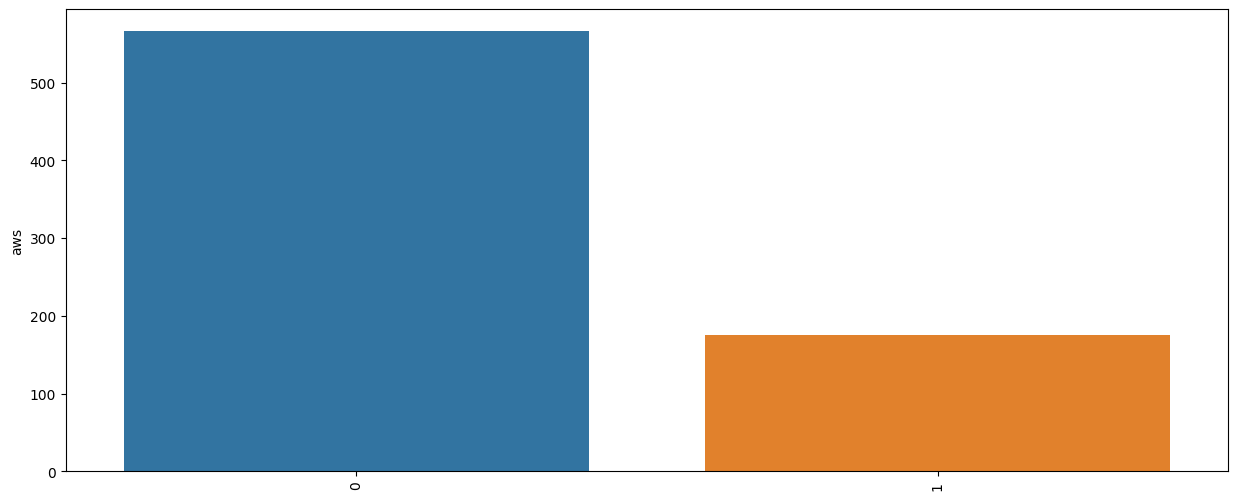

graph for excel total: 2


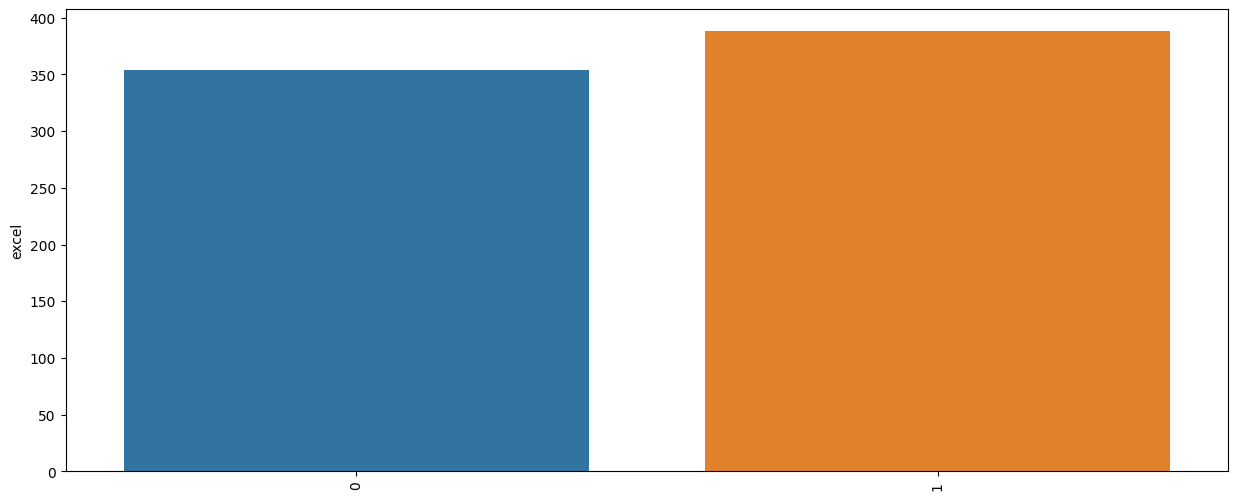

graph for Job_simplification total: 7


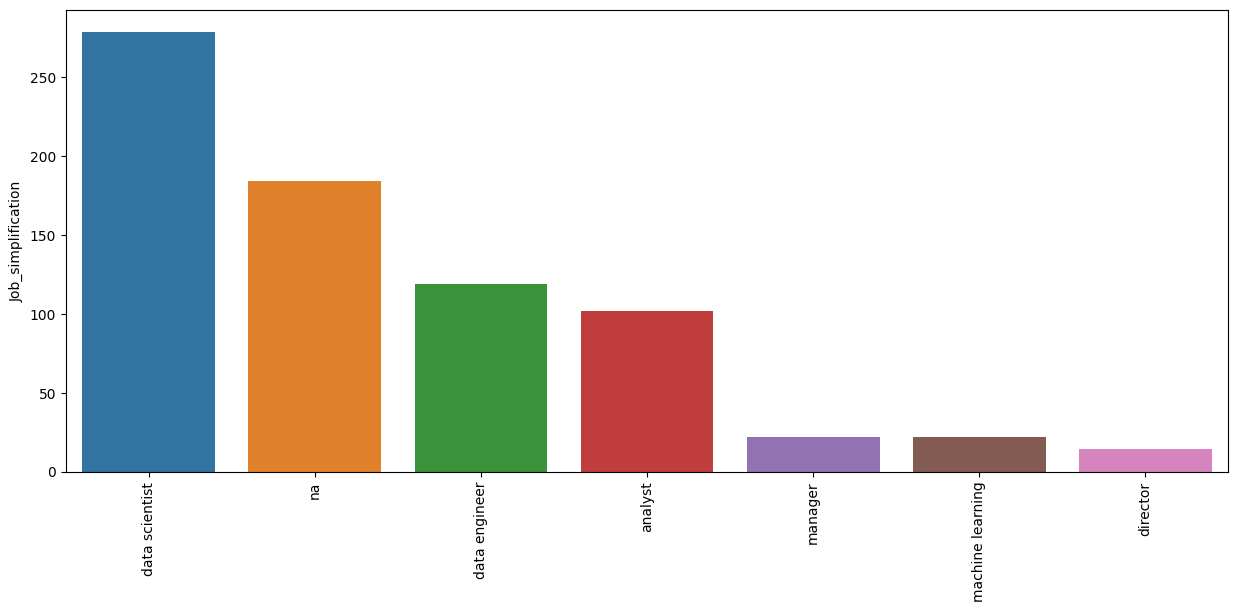

graph for seniority total: 3


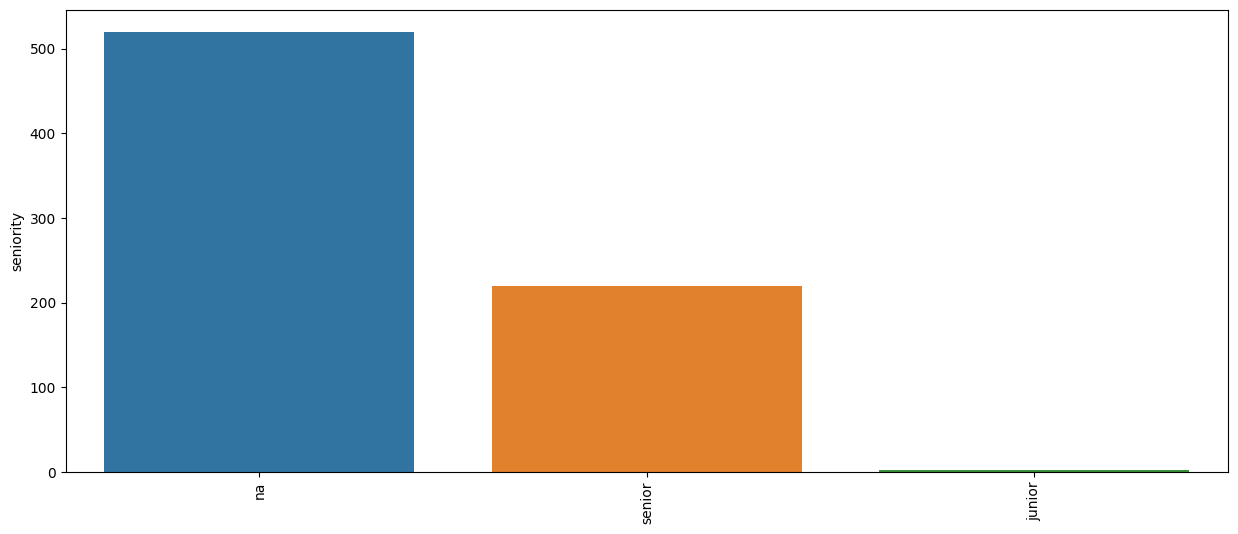

In [108]:
for i in df_cat.columns:
    df_cat_num=df_cat[i].value_counts()
    print('graph for %s total: %d' %(i,len(df_cat_num)))
    fig, ax = plt.subplots(figsize=(15, 6))
    chart=sns.barplot(x=df_cat_num.index,y=df_cat_num, ax= ax)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for Location total: 20


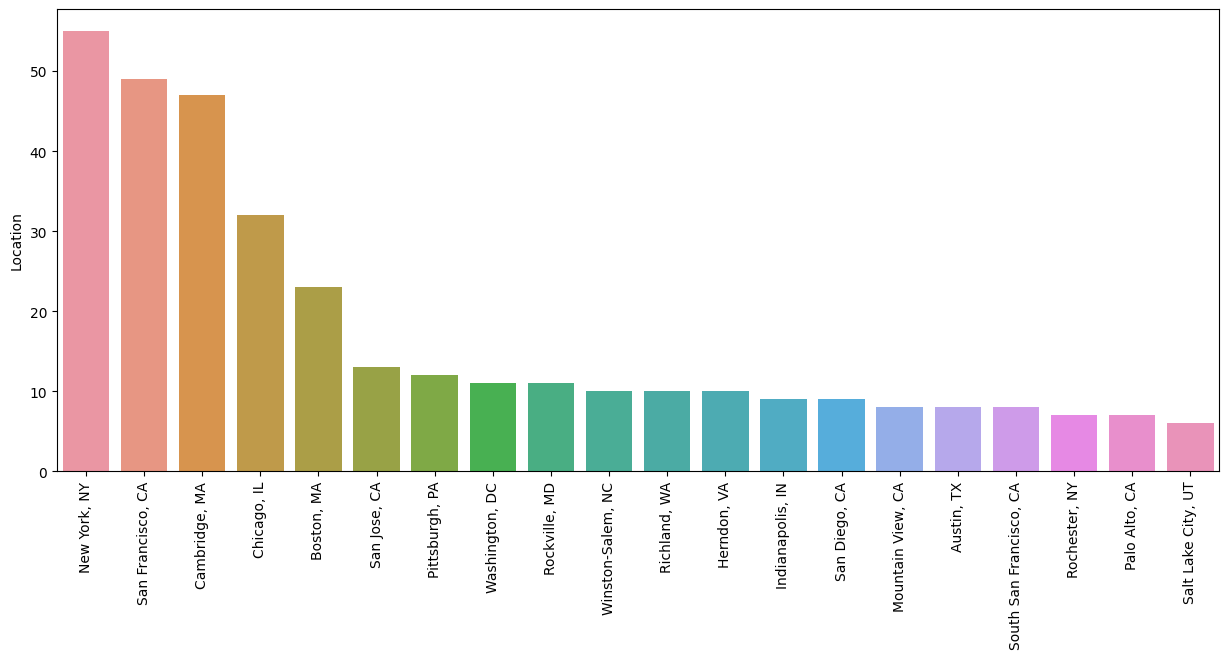

graph for Headquarters total: 20


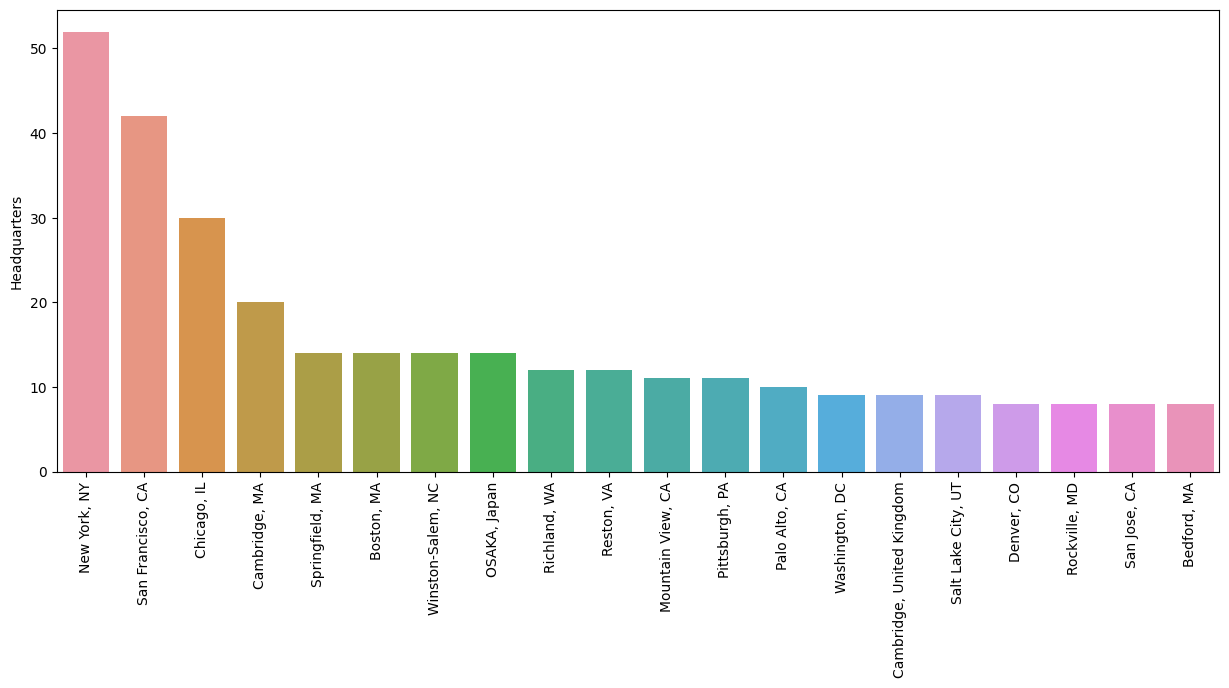

graph for company_txt total: 20


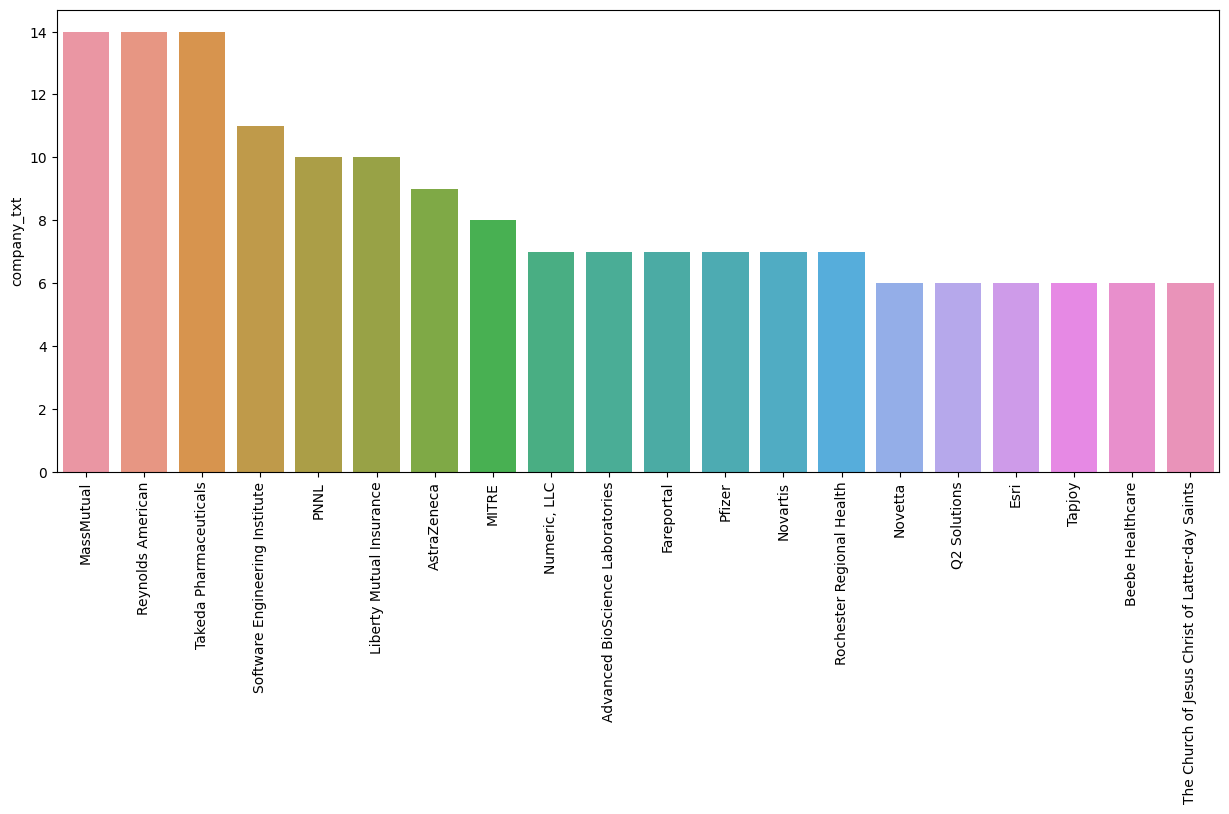

In [109]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    df_cat_num=df_cat[i].value_counts()[:20]
    print('graph for %s total: %d' %(i,len(df_cat_num)))
    fig, ax = plt.subplots(figsize=(15, 6))
    chart=sns.barplot(x=df_cat_num.index,y=df_cat_num, ax= ax)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [111]:
df.pivot_table(index='Job_simplification',values='avg_salary')

,avg_salary
Job_simplification,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [113]:
df.pivot_table(index=['Job_simplification','seniority'],values='avg_salary')

avg_salary
Job_simplification seniority            
analyst            junior      56.500000
                   na          61.155405
                   senior      79.092593
data engineer      na          96.701220
                   senior     124.689189
data scientist     junior     106.500000
                   na         107.043011
                   senior     138.956522
director           na         168.607143
machine learning   na         119.133333
                   senior     142.071429
manager            na          84.022727
na                 na          73.988189
                   senior     109.061404

In [114]:
pd.set_option('display.max_rows',None)

In [116]:
df.pivot_table(index=['job_state','Job_simplification'],values='avg_salary',aggfunc='count').sort_values('job_state',ascending=False)

avg_salary
job_state    Job_simplification            
 WI          na                           4
             data scientist               3
             analyst                      3
 WA          na                           1
             data scientist              17
             analyst                      3
 VA          na                           5
             machine learning             2
             data scientist              18
             data engineer               10
             analyst                      6
 UT          data engineer                3
             analyst                      4
             data scientist               3
 TX          na                           7
             data scientist              13
             data engineer                8
 TN          data scientist               1
             data engineer               10
             analyst                      2
 SC          na                           1
 RI          analyst                      1
 PA          machine learning             7
             data engineer                1
             data scientist               6
             analyst                      8
             manager                      3
             na                           8
 OR          data scientist               3
             data engineer                1
 OH          na                           3
             data scientist               7
             analyst                      4
 NY          na                          12
             machine learning             2
             data scientist              40
             data engineer                4
             analyst                     14
 NM          data scientist               3
 NJ          data scientist               4
             analyst                      6
             data engineer                2
             manager                      2
             director                     2
             na                           1
 NE          na                           4
 NC          na                          12
             data scientist               3
             data engineer                6
 MO          na                           3
             manager                      1
             data scientist               3
             analyst                      2
 MN          data engineer                1
             analyst                      1
 MI          data scientist               4
             manager                      2
 MD          na                          16
             data scientist              13
             data engineer                3
             analyst                      3
 MA          na                          46
             manager                      5
             director                     6
             data scientist              30
             data engineer               12
             analyst                      4
 Los Angeles data scientist               1
 LA          analyst                      1
             data engineer                2
             na                           1
 KY          na                           4
             data scientist               2
 KS          machine learning             3
 IN          na                           4
             data scientist               2
             data engineer                4
 IL          analyst                      3
             na                           6
             machine learning             2
             director                     6
             data scientist              15
             data engineer                8
 ID          analyst                      2
 IA          analyst                      2
             data engineer                3
 GA          data scientist               3
             na                           3
 FL          data scientist               7
             data engineer   

In [124]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r-studio', 'spark', 'aws', 'excel', 'Job_simplification', 'seniority',
       'job state', 'dscrpt_len', 'no_of_comp'],
      dtype='object')

In [127]:
df_pivots=df[['Rating','Industry','Sector','Revenue','no_of_comp','hourly','employer provided','python','r-studio','spark','aws','excel','Type of ownership','avg_salary']]

In [128]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary'))

Rating
        avg_salary
Rating            
-1.0    136.181818
 1.9     87.500000
 2.1     95.900000
 2.2     97.750000
 2.3     81.500000
 2.4     60.214286
 2.5    120.000000
 2.6    109.083333
 2.7     83.250000
 2.8     83.928571
 2.9     81.138889
 3.0     85.588235
 3.1     86.580000
 3.2    105.500000
 3.3    101.858974
 3.4     93.011364
 3.5    104.897959
 3.6     85.467391
 3.7    104.131148
 3.8     96.811475
 3.9    113.071429
 4.0    105.340426
 4.1    116.368421
 4.2    100.442308
 4.3    102.468750
 4.4    108.606061
 4.5    117.714286
 4.6     97.250000
 4.7    103.983871
 4.8     80.277778
 5.0    134.700000
Industry
                                          avg_salary
Industry                                            
-1                                        114.650000
Accounting                                113.500000
Advertising & Marketing                   104.300000
Aerospace & Defense                        99.060000
Architectural & Engineering Services   

ValueError: Grouper for 'avg_salary' not 1-dimensional